https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/

https://github.com/AssemblyAI-Examples/Machine-Learning-From-Scratch/blob/main/01%20KNN/KNN.py

https://www.geeksforgeeks.org/implementation-of-k-nearest-neighbors-from-scratch-using-python/?ref=rp

https://medium.com/analytics-vidhya/naive-bayes-algorithm-from-scratch-c59d262a042

https://github.com/The-Swapster/NaiveBayes/blob/main/B2_N041_NaiveBayesandStandardScaler.py

## Generative Classifier Implementation

In this question, you are asked to train two generative classifiers (Naive Bayes and k-NN) from scratch to dealing with a classification task. The heart failure prediction dataset contains 11 common features (e.g., age, sex, and several medical predictor variables) from 918 patient examples that can be used to predict whether the patient has heart disease (1) or not (0).

Dataset


1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

### Import necessary libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 01. Naive Bayes




The simple answer: multiply result!! it's the same.

Naive Bayes based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features - meaning you calculate the Bayes probability dependent on a specific feature without holding the others - which means that the algorithm multiply each probability from one feature with the probability from the second feature (and we totally ignore the denominator - since it is just a normalizer).

so the right answer is:

calculate the probability from the categorical variables.
calculate the probability from the continuous variables.
multiply 1. and 2.

In [13]:
dataFrame = pd.read_csv("heart.csv")
dataFrame

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df = dataFrame.copy()

### Basic EDA

<AxesSubplot:>

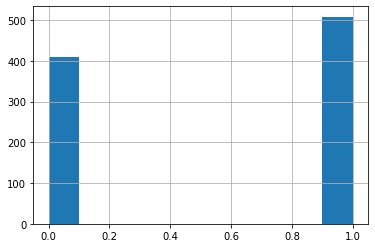

In [4]:
#checking how the target variable is distributed
df["HeartDisease"].hist()

In [5]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<AxesSubplot:>

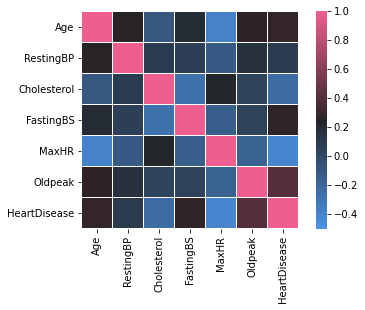

In [6]:
# If the continuous features are Independent
# columns = [Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease] 

df_cont = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']]
#corr = df.corr(method = "pearson")
corr = df_cont.corr(method = "pearson")
cmap = sns.diverging_palette(250,354,80,60, center = 'dark', as_cmap = True)
sns.heatmap(corr, vmax = 1, vmin = -0.5, cmap = cmap, square = True, linewidth = 0.2)

the features are independent of each other as there is no strong positive correlation

### Convert the Continuous features to Categorical features

In [7]:
df["Age_category"] = pd.cut(df["Age"].values, bins = 6, labels = [0,1,2,3,4,5])
df["RestingBP_category"] = pd.cut(df["RestingBP"].values, bins = 6, labels = [0,1,2,3,4,5])
df["Cholesterol_category"] = pd.cut(df["Cholesterol"].values, bins = 6, labels = [0,1,2,3,4,5])
df["FastingBS_category"] = pd.cut(df["FastingBS"].values, bins = 6, labels = [0,1,2,3,4,5])
df["MaxHR_category"] = pd.cut(df["MaxHR"].values, bins = 6, labels = [0,1,2,3,4,5])
df["Oldpeak_category"] = pd.cut(df["Oldpeak"].values, bins = 6, labels = [0,1,2,3,4,5])

df = df.drop(columns=["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"])
#df = df[["Age_category","RestingBP_category","Cholesterol_category", "FastingBS_category", "MaxHR_category", "Oldpeak_category","HeartDisease"]]
df.head(10)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease,Age_category,RestingBP_category,Cholesterol_category,FastingBS_category,MaxHR_category,Oldpeak_category
0,M,ATA,Normal,N,Up,0,1,4,2,0,4,1
1,F,NAP,Normal,N,Flat,1,2,4,1,0,4,2
2,M,ATA,ST,N,Up,0,1,3,2,0,1,1
3,F,ASY,Normal,Y,Flat,1,2,4,2,0,2,2
4,M,NAP,Normal,N,Up,0,3,4,1,0,2,1
5,M,NAP,Normal,N,Up,0,1,3,3,0,4,1
6,F,ATA,Normal,N,Up,0,2,3,2,0,4,1
7,M,ATA,Normal,N,Up,0,3,3,2,0,3,1
8,M,ASY,Normal,Y,Flat,1,1,4,2,0,2,2
9,F,ATA,Normal,N,Up,0,2,3,2,0,2,1


### One Hot Encoding

In [8]:
dummie_sex = pd.get_dummies(df.Sex)
dummie_EA = pd.get_dummies(df.ExerciseAngina)
dummie_CP = pd.get_dummies(df.ChestPainType)
dummie_RECG = pd.get_dummies(df.RestingECG)
dummie_STS = pd.get_dummies(df.ST_Slope)

#Merging dummy variables
merged_df = pd.concat([df,dummie_sex,dummie_EA,dummie_CP,dummie_RECG,dummie_STS],axis=1)
pd.set_option('display.max_columns', None)

#dropping the categorical columns
final_df = merged_df.drop(['Sex','ExerciseAngina','ChestPainType','RestingECG','ST_Slope'], axis=1)
pd.set_option('display.max_columns', None)
final_df.head()

,HeartDisease,Age_category,RestingBP_category,Cholesterol_category,FastingBS_category,MaxHR_category,Oldpeak_category,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,0,1,4,2,0,4,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,1,2,4,1,0,4,2,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,0,1,3,2,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,1,2,4,2,0,2,2,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,0,3,4,1,0,2,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1


In [9]:
final_df.shape

(918, 21)

### Train-Test Split (80%-20%) 

In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(final_df, test_size=.2, random_state=42)

In [11]:
train.shape

(734, 21)

In [12]:
test.shape

(184, 21)

In [13]:
train.HeartDisease.value_counts()

1    401
0    333
Name: HeartDisease, dtype: int64

In [14]:
test.HeartDisease.value_counts()

1    107
0     77
Name: HeartDisease, dtype: int64

In [15]:
#yes = len(train[train["HeartDisease"]==0]) #333

### Calculate Prior Class propability P(C)

In [16]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique())) #number of classes from the label column [HeartDisease] -> 0,1
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [17]:
prior = calculate_prior(df_cont, Y = "HeartDisease")
prior #[0.4466230936819172, 0.5533769063180828]

[0.4466230936819172, 0.5533769063180828]

### Calculate P(X|C) 
probability that an instance drawn from class Ci would be x (likelihood)

In [18]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    #print(len(df))
    p_x_given_class = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_class

### P(C|X) = P(X=x1|C=c)P(X=x2|C=c)...P(X=xn|C=c) * P(C=c) 

In [19]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[1:]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels) #likelihood is [1,1], initialized to 1 for both classes
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

### Test Categorical naive Bayes Model

In [20]:
X_test = test.iloc[:,1:].values
Y_test = test.iloc[:,0].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="HeartDisease")

from sklearn.metrics import confusion_matrix, f1_score

print(confusion_matrix(Y_test, Y_pred)) # 66 11 17 90
print(f1_score(Y_test, Y_pred)) #0.8653846153846154

[[66 11]
 [17 90]]
0.8653846153846154


In [ ]:
#Y_pred

## 02. KNN

In [14]:
df2 = dataFrame.copy()

In [15]:
df2["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [16]:
df2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### One Hot Encoding

In [17]:
dummie_sex = pd.get_dummies(df2.Sex)
dummie_EA = pd.get_dummies(df2.ExerciseAngina)
dummie_CP = pd.get_dummies(df2.ChestPainType)
dummie_RECG = pd.get_dummies(df2.RestingECG)
dummie_STS = pd.get_dummies(df2.ST_Slope)

In [18]:
#Merging dummy variables
merged_df = pd.concat([df2,dummie_sex,dummie_EA,dummie_CP,dummie_RECG,dummie_STS],axis=1)
pd.set_option('display.max_columns', None)
merged_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


In [19]:
#dropping the categorical columns
final_df = merged_df.drop(['Sex','ExerciseAngina','ChestPainType','RestingECG','ST_Slope'], axis=1)
pd.set_option('display.max_columns', None)
final_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,140,289,0,172,0.0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


In [20]:
Y = final_df.HeartDisease.values # Y is now a numpy array
X = final_df.drop(['HeartDisease'],axis=1)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


In [21]:
X.shape

(918, 20)

### Train-Validation-Test Split

In [29]:
#first split the test dataset from the main dataset, here the test dataset is 20%  

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 184, stratify = Y, random_state = 42)

In [30]:
#now the rest of the dataset will be part of the cross-validation

train_data = X_train
train_data['HeartDisease'] = Y_train.tolist()
train_data #734 X 21

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up,HeartDisease
485,63,139,217,1,128,1.2,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1
486,55,110,214,1,180,0.4,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0
117,59,130,338,1,130,1.5,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1
361,47,160,0,0,124,0.0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1
296,50,145,0,1,139,0.7,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,51,135,160,0,150,2.0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1
201,46,120,230,0,150,0.0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0
462,59,122,233,0,117,1.3,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1
252,61,125,292,0,115,0.0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0


In [31]:
train_data = train_data.reset_index(drop=True)                                                                                   
print("data with reseted index: ")

train_data

data with reseted index: 


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up,HeartDisease
0,63,139,217,1,128,1.2,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1
1,55,110,214,1,180,0.4,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0
2,59,130,338,1,130,1.5,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1
3,47,160,0,0,124,0.0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1
4,50,145,0,1,139,0.7,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,51,135,160,0,150,2.0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1
730,46,120,230,0,150,0.0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0
731,59,122,233,0,117,1.3,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1
732,61,125,292,0,115,0.0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0


In [32]:
#four folds                                                              
fold1 = train_data.loc[0:183]                                            
fold2 = train_data.loc[184:367]
fold3 = train_data.loc[368:551]
fold4 = train_data.loc[552:733]

In [33]:
#creating four different train-test split 

train_val1 = pd.concat([fold1, fold2, fold3])
test_val1 = fold4

train_val2 = pd.concat([fold1, fold2, fold4])
test_val2 = fold3

train_val3 = pd.concat([fold1, fold3, fold4])
test_val3 = fold2

train_val4 = pd.concat([fold2, fold3, fold4])
test_val4 = fold1

In [34]:
# seperating the X and Y in each fold

train_val1_Y = train_val1.HeartDisease.values
train_val1_X = train_val1.drop(['HeartDisease'],axis=1)
test_val1_Y = test_val1.HeartDisease.values
test_val1_X = test_val1.drop(['HeartDisease'],axis=1)

train_val2_Y = train_val2.HeartDisease.values
train_val2_X = train_val2.drop(['HeartDisease'],axis=1)
test_val2_Y = test_val2.HeartDisease.values
test_val2_X = test_val2.drop(['HeartDisease'],axis=1)

train_val3_Y = train_val3.HeartDisease.values
train_val3_X = train_val3.drop(['HeartDisease'],axis=1)
test_val3_Y = test_val3.HeartDisease.values
test_val3_X = test_val3.drop(['HeartDisease'],axis=1)

train_val4_Y = train_val4.HeartDisease.values
train_val4_X = train_val4.drop(['HeartDisease'],axis=1)
test_val4_Y = test_val4.HeartDisease.values
test_val4_X = test_val4.drop(['HeartDisease'],axis=1)

In [44]:
#train_val1_Y

### Standardized dataset

In [35]:
X_test = (X_test - X_test.mean()) / X_test.std()

train_val1_X = (train_val1_X - train_val1_X.mean()) / train_val1_X.std()
test_val1_X = (test_val1_X - test_val1_X.mean()) / test_val1_X.std()

train_val2_X = (train_val2_X - train_val2_X.mean()) / train_val2_X.std()
test_val2_X = (test_val2_X - test_val2_X.mean()) / test_val2_X.std()

train_val3_X = (train_val3_X - train_val3_X.mean()) / train_val3_X.std()
test_val3_X = (test_val3_X - test_val3_X.mean()) / test_val3_X.std()

train_val4_X = (train_val4_X - train_val4_X.mean()) / train_val4_X.std()
test_val4_X = (test_val4_X - test_val4_X.mean()) / test_val4_X.std()

In [38]:
print ("Shape of X_test: ", X_test.shape)
print ("___________________________________________________________-")
print ("Shape of first validation - train: ", train_val1_X.shape)
print ("Shape of first validation - test: ", test_val1_X.shape)
print ("___________________________________________________________-")
print ("Shape of second validation - train: ", train_val2_X.shape)
print ("Shape of second validation - test: ", test_val2_X.shape)
print ("___________________________________________________________-")
print ("Shape of third validation - train: ", train_val3_X.shape)
print ("Shape of third validation - test: ", test_val3_X.shape)
print ("___________________________________________________________-")
print ("Shape of fourth validation - train: ", train_val4_X.shape)
print ("Shape of fourth validation - test: ", test_val4_X.shape)

Shape of X_test:  (184, 20)
___________________________________________________________-
Shape of first validation - train:  (552, 20)
Shape of first validation - test:  (182, 20)
___________________________________________________________-
Shape of second validation - train:  (550, 20)
Shape of second validation - test:  (184, 20)
___________________________________________________________-
Shape of third validation - train:  (550, 20)
Shape of third validation - test:  (184, 20)
___________________________________________________________-
Shape of fourth validation - train:  (550, 20)
Shape of fourth validation - test:  (184, 20)


#### Converting all the DataFrame to Numpy Array for Mathematical Computation

In [42]:
X_test_numpy = X_test.to_numpy()

train_val1_X_numpy = train_val1_X.to_numpy()
train_val2_X_numpy = train_val2_X.to_numpy()
train_val3_X_numpy = train_val3_X.to_numpy()
train_val4_X_numpy = train_val4_X.to_numpy()

test_val1_X = test_val1_X.to_numpy()
test_val2_X = test_val2_X.to_numpy()
test_val3_X = test_val3_X.to_numpy()
test_val4_X = test_val4_X.to_numpy()

#X_test_numpy

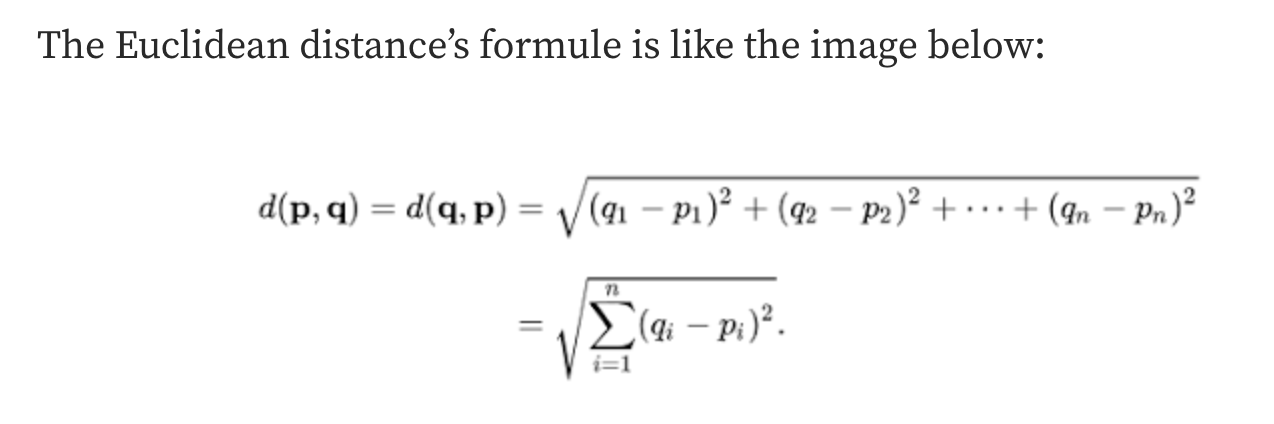

In [40]:
def euclidean_distance(p,q): 
    return np.sqrt(np.sum((p-q)**2))

In [41]:
from scipy import stats

#Function to calculate KNN
def knn(X_train, Y_train , X_test, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in X_test: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(X_train)): 
            distances = euclidean_distance(np.array(X_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = Y_train[dist]
         
        #Majority voting
        lab = stats.mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

In [50]:
#Applying knn function to each validation fold
from sklearn.metrics import f1_score

score1_list = {}

for k in range(1,30):
    Y_pred1 = knn(train_val1_X_numpy,train_val1_Y,test_val1_X , k)
    
    score = f1_score(test_val1_Y, Y_pred1)
    
    score1_list[k] = score       

In [51]:
score2_list = {}

for k in range(1,30):
    Y_pred2 = knn(train_val2_X_numpy,train_val2_Y,test_val2_X , k)
    
    score = f1_score(test_val2_Y, Y_pred2)
    
    score2_list[k] = score

In [52]:
score3_list = {}

for k in range(1,30):
    Y_pred3 = knn(train_val3_X_numpy,train_val3_Y,test_val3_X , k)
    
    score = f1_score(test_val3_Y, Y_pred3)
    
    score3_list[k] = score

In [53]:
score4_list = {}

for k in range(1,30):
    Y_pred4 = knn(train_val4_X_numpy,train_val4_Y,test_val4_X , k)
    
    score = f1_score(test_val4_Y, Y_pred4)
    
    score4_list[k] = score

In [55]:
#score4_list

In [56]:
all_score = {}
for k in range(1,30):
    all_score[k] = [score1_list[k], score2_list[k], score3_list[k], score4_list[k]]

In [59]:
type(all_score)

dict

In [60]:
import operator

average_f1_score = {}

for k_value, f1 in all_score.items():
    average = float(sum(f1))/len(f1)
    average_f1_score[k_value] = average

In [61]:
average_f1_score

{1: 0.8184480676328503,
 2: 0.7807179046325805,
 3: 0.837884211602616,
 4: 0.8274787729943369,
 5: 0.8594110025812067,
 6: 0.8513605917716289,
 7: 0.8635312309078181,
 8: 0.8567379300804859,
 9: 0.8653220660353225,
 10: 0.858042669795743,
 11: 0.8659274524476347,
 12: 0.8572743962078019,
 13: 0.865649171687328,
 14: 0.8678328281074261,
 15: 0.868613220438643,
 16: 0.8745128100434864,
 17: 0.8774865975091075,
 18: 0.8733177503929122,
 19: 0.8771081258575188,
 20: 0.8761012653993159,
 21: 0.8763885251880255,
 22: 0.8717950078735653,
 23: 0.8721808197555314,
 24: 0.8705338570457543,
 25: 0.8748416070002819,
 26: 0.8731572794230973,
 27: 0.876014181293157,
 28: 0.8755197062746567,
 29: 0.8784390063033}

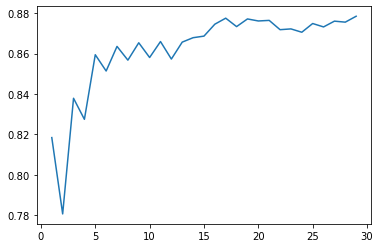

In [62]:
plt.plot(*zip(*sorted(average_f1_score.items())))
plt.show()

In [47]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
print ('Accuracy of the classifier is', accuracy_score(test_val1_Y, Y_pred1)*100, '%')

Accuracy of the classifier is 79.67032967032966 %


In [48]:
confusion_matrix(test_val1_Y, Y_pred1)

array([[57, 24],
       [13, 88]])

In [49]:
print(classification_report(test_val1_Y,Y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        81
           1       0.79      0.87      0.83       101

    accuracy                           0.80       182
   macro avg       0.80      0.79      0.79       182
weighted avg       0.80      0.80      0.79       182



## Full Cross Validation Grid Search for K Value

### Creating a Pipeline to find K value

**Follow along very carefully here! We use very specific string codes AND variable names here so that everything matches up correctly. This is not a case where you can easily swap out variable names for whatever you want!**

We'll use a Pipeline object to set up a workflow of operations:

1. Scale Data
2. Create Model on Scaled Data

----

What happens can be discribed as follows:

* Step 0: The data are split into TRAINING data and TEST data according to the cv parameter that you specified in the GridSearchCV.
* Step 1: the scaler is fitted on the TRAINING data
* Step 2: the scaler transforms TRAINING data
* Step 3: the models are fitted/trained using the transformed TRAINING data
* Step 4: the scaler is used to transform the TEST data
* Step 5: the trained models predict using the transformed TEST data

----

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [24]:
X_main, X_test, Y_main, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_main, Y_main, test_size=0.2, random_state=42)

In [4]:
knn = KNeighborsClassifier()

In [5]:
operations = [('scaler',scaler),('knn',knn)]

In [6]:
from sklearn.pipeline import Pipeline

In [7]:
pipe = Pipeline(operations)

In [8]:
from sklearn.model_selection import GridSearchCV

In [27]:
k_values = list(range(1,100))

In [28]:
param_grid = {'knn__n_neighbors': k_values}

In [29]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [30]:
full_cv_classifier.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='accuracy')

In [31]:
full_cv_classifier.best_estimator_.get_params('knn__metric':'eu')

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=31))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=31),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 31,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [32]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [33]:
len(k_values)

99

In [34]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.79384326, 0.78361582, 0.82278719, 0.81936839, 0.83126177,
       0.82622048, 0.83811386, 0.83302912, 0.8330436 , 0.82795886,
       0.82452557, 0.83136318, 0.83473852, 0.83815732, 0.83985224,
       0.83646241, 0.84495147, 0.84324207, 0.84664639, 0.84664639,
       0.8432131 , 0.84493698, 0.84664639, 0.8449225 , 0.85345502,
       0.85345502, 0.85514993, 0.85344053, 0.86197306, 0.86368246,
       0.86539186, 0.85855425, 0.85855425, 0.86024917, 0.86197306,
       0.85855425, 0.85685934, 0.86026365, 0.86026365, 0.86026365,
       0.85856874, 0.86198754, 0.86369694, 0.86368246, 0.86027814,
       0.85858322, 0.85858322, 0.86029263, 0.86198754, 0.86200203,
       0.86200203, 0.86030711, 0.86369694, 0.86200203, 0.86200203,
       0.86200203, 0.86029263, 0.86029263, 0.85858322, 0.86369694,
       0.85858322, 0.86029263, 0.85858322, 0.85858322, 0.85858322,
       0.85859771, 0.85859771, 0.85859771, 0.86029263, 0.86029263,
       0.86029263, 0.86029263, 0.85859771, 0.85859771, 0.85861

## Elbow Method for choosing K value

In [44]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_validation = scaler.fit_transform(X_validation)
scaled_X_test = scaler.transform(X_test)

In [48]:
test_error_rates = []

for k in range(1,100):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,Y_train) 
   
    Y_pred_test = knn_model.predict(scaled_X_validation)
    
    test_error = 1 - accuracy_score(Y_validation,Y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

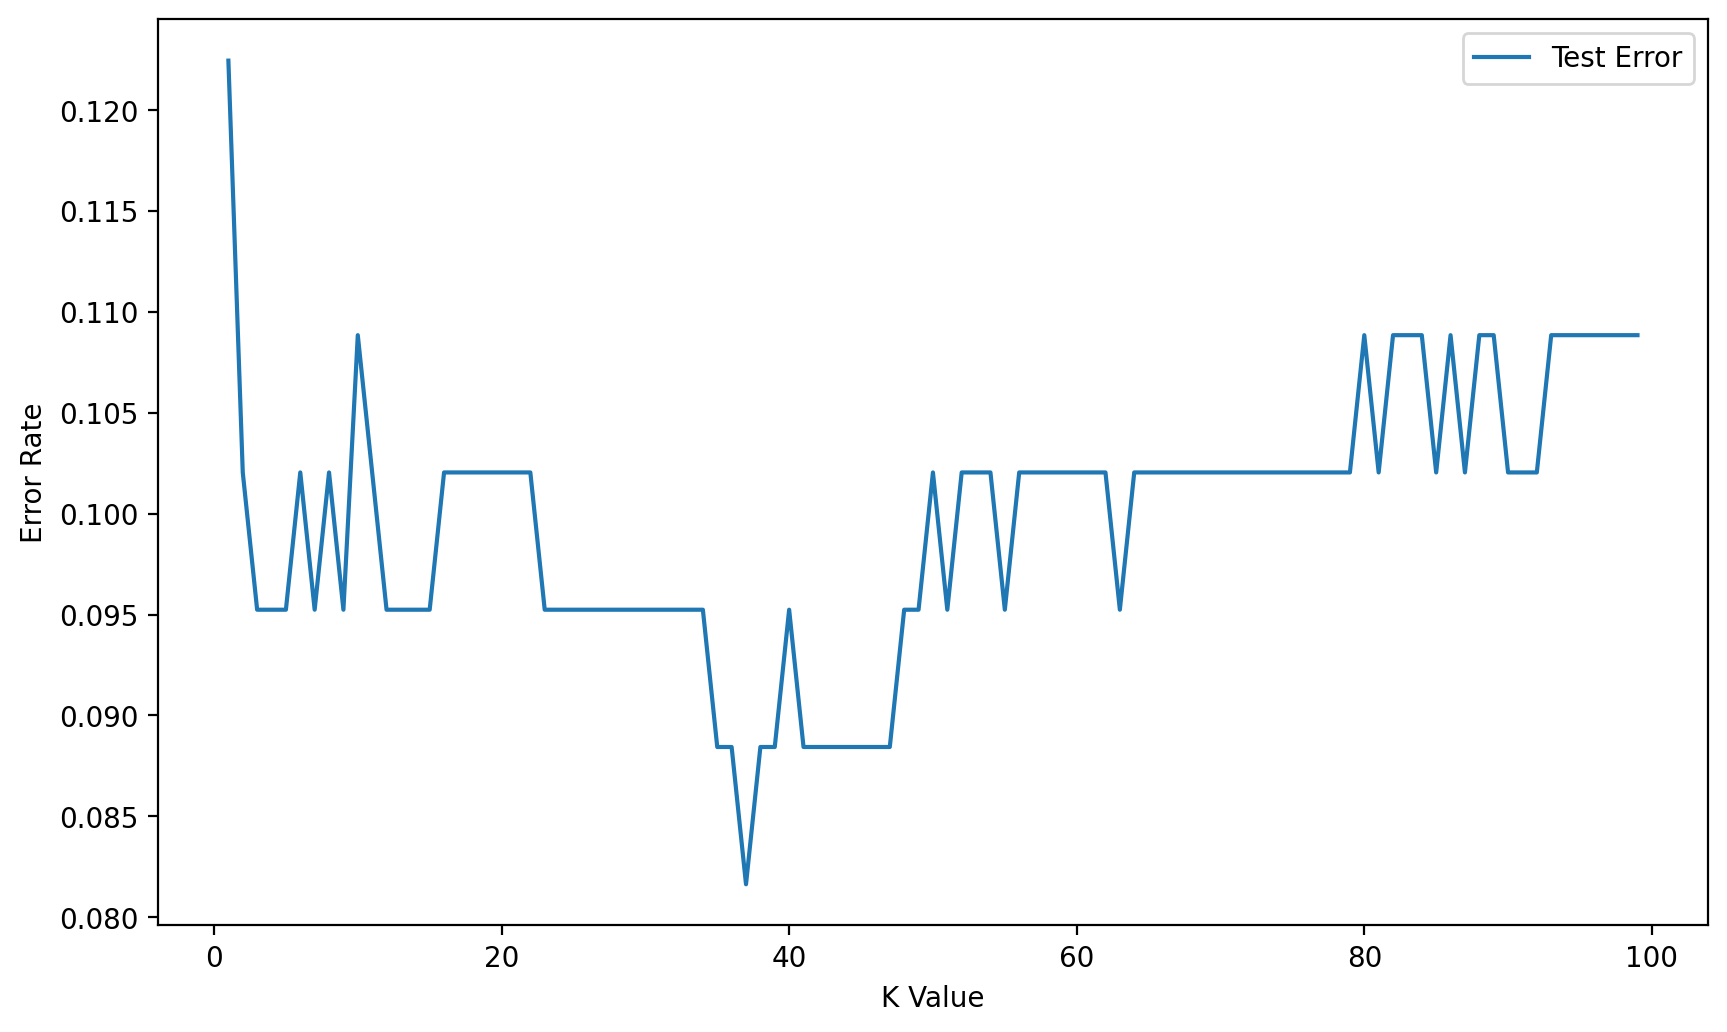

In [49]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,100),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [52]:
min(test_error_rates)

0.08163265306122447

## Final Model

We just saw that our  GridSearch recommends a K=14 (in line with our alternative Elbow Method). Let's now use the PipeLine again, but this time, no need to do a grid search, instead we will evaluate on our hold-out Test Set.

In [35]:
scaler = StandardScaler()
knn31 = KNeighborsClassifier(n_neighbors=31)
operations = [('scaler',scaler),('knn31',knn31)]

In [36]:
pipe = Pipeline(operations)

In [38]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn31', KNeighborsClassifier(n_neighbors=31))])

In [39]:
pipe_pred = pipe.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(Y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



In [43]:
confusion_matrix(Y_test, pipe_pred)

array([[67, 10],
       [15, 92]])